#**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Load Dataset**

In [2]:
dataset1 = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/PrediksiEnergi/events.csv'
df = pd.read_csv(dataset1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Start time UTC                      52966 non-null  object 
 1   End time UTC                        52966 non-null  object 
 2   Start time UTC+03:00                52966 non-null  object 
 3   End time UTC+03:00                  52966 non-null  object 
 4   Electricity consumption in Finland  52966 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [4]:
print(df.describe(), "\n")

       Electricity consumption in Finland
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000 



In [5]:
df_subset = df.loc[:, ["End time UTC+03:00", "Electricity consumption in Finland"]]
df_subset = df_subset.rename(columns={"End time UTC+03:00": "DateTime", "Electricity consumption in Finland": "Consumption"})

df_subset.head(5)

,DateTime,Consumption
0,2016-01-01 01:00:00,10800.0
1,2016-01-01 02:00:00,10431.0
2,2016-01-01 03:00:00,10005.0
3,2016-01-01 04:00:00,9722.0
4,2016-01-01 05:00:00,9599.0


In [6]:
dataset = df_subset
dataset["Month"] = pd.to_datetime(dataset["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(dataset["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(dataset["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(dataset["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(dataset["DateTime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(dataset["DateTime"]).dt.day_name()
dataset = dataset.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday


In [7]:
print("Total Number of Years: ", dataset.Year.nunique() )
print(dataset.Year.unique())

Total Number of Years:  7
[2016 2017 2018 2019 2020 2021 2022]


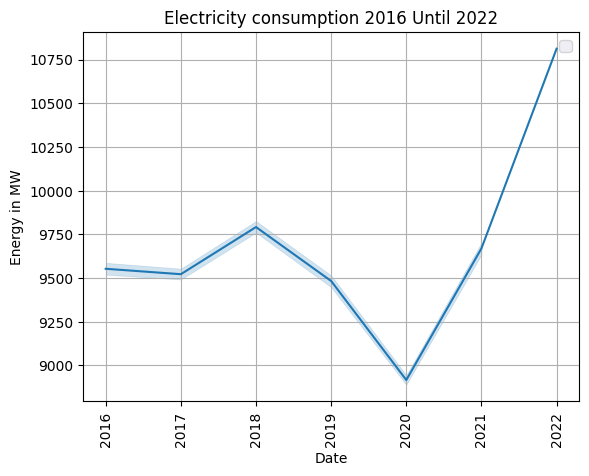

In [8]:
from matplotlib import style
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= dataset["Year"], y= dataset["Consumption"], data = dataset)
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Electricity consumption 2016 Until 2022")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)


<ipython-input-9-0801f72f3c60>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Consumption"])


Text(0.5, 1.0, 'Energy Distribution')

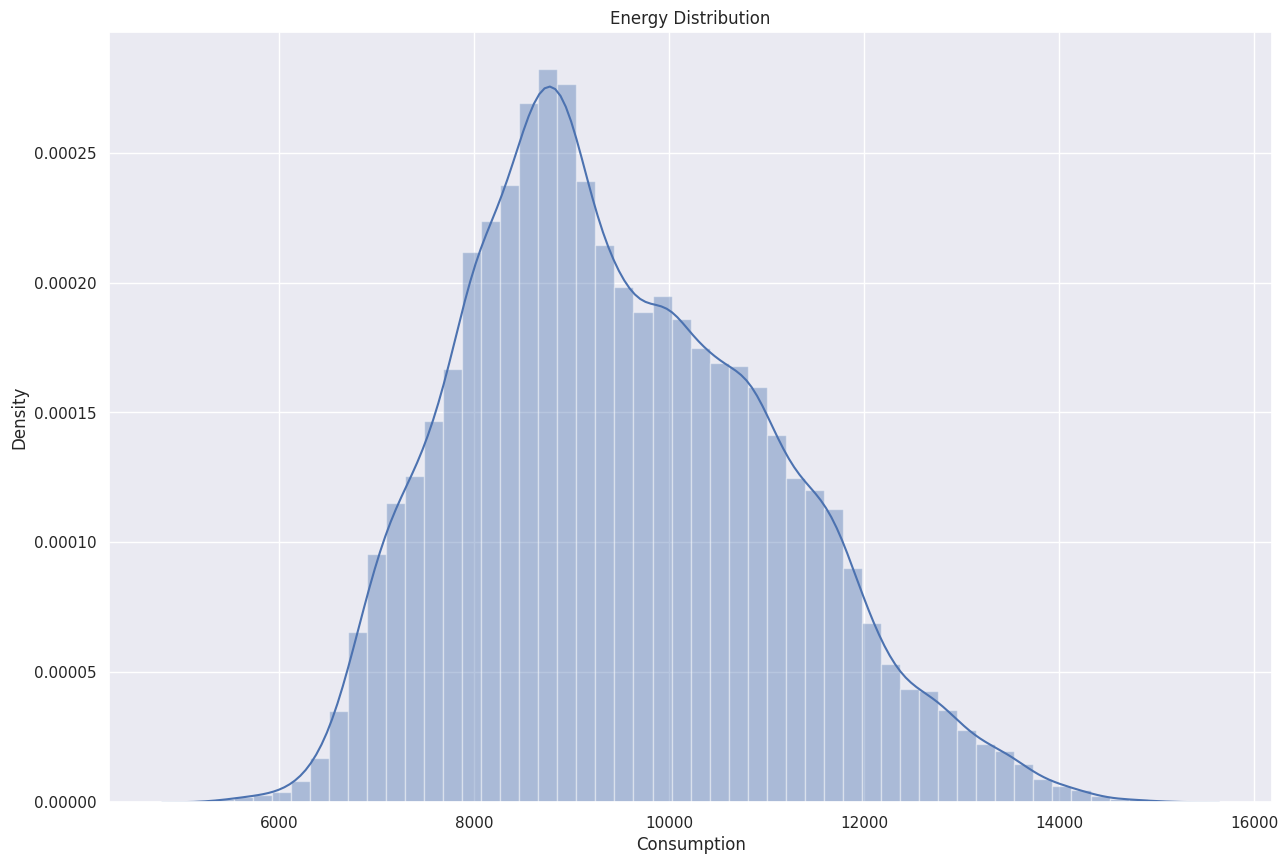

In [9]:
# Lets us see the Distribution off Energy Consumption so we have a idea about your Dataset a bit more
fig = plt.figure(figsize = (15,10))
sns.distplot(dataset["Consumption"])
plt.title("Energy Distribution")

<ipython-input-10-b3691fa3078a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(x=dataset1.index.hour, y=dataset1.Consumption, data=df, palette='Set3')


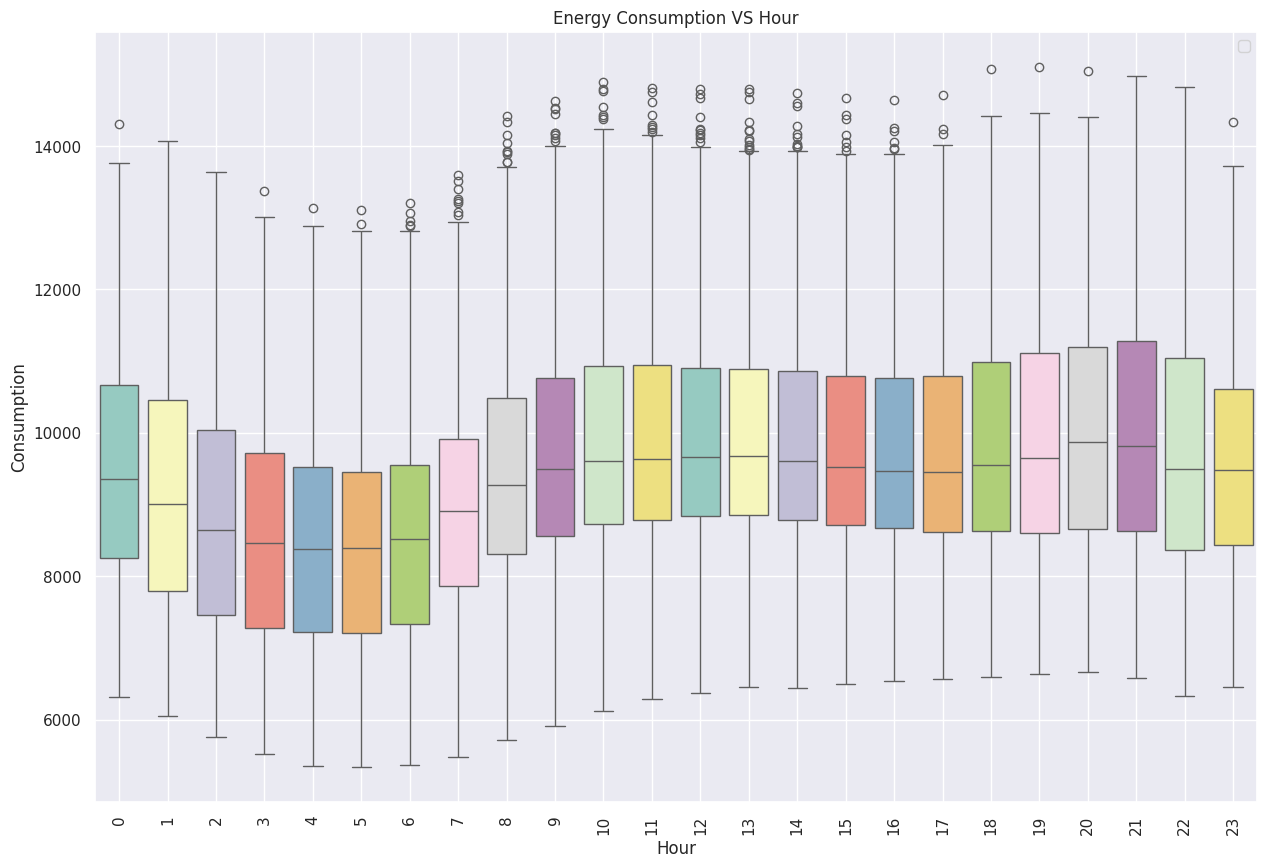

In [10]:
dataset1 = dataset
fig = plt.figure(figsize=(15, 10))
ax1 = sns.boxplot(x=dataset1.index.hour, y=dataset1.Consumption, data=df, palette='Set3')
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


#**Downsampling**

In [11]:
# Tambahkan kolom Week menggunakan isocalendar().week pada kolom DateTime
#df_subset["Week"] = df_subset["DateTime"].dt.isocalendar().week

# Buat DataFrame baru dengan kolom DateTime sebagai indeks
#dataset = df_subset.set_index("DateTime")

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset
dataset1 = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/PrediksiEnergi/events.csv'
df = pd.read_csv(dataset1)

# Ubah tipe data kolom "End time UTC+03:00" menjadi datetime
df["End time UTC+03:00"] = pd.to_datetime(df["End time UTC+03:00"], errors='coerce')

# Hapus baris dengan tanggal yang tidak valid
df = df.dropna(subset=["End time UTC+03:00"])

# Pilih kolom yang diperlukan dan ubah nama kolom
df_subset = df[["End time UTC+03:00", "Electricity consumption in Finland"]]
df_subset = df_subset.rename(columns={"End time UTC+03:00": "DateTime", "Electricity consumption in Finland": "Consumption"})

# Tambahkan kolom "Week" berdasarkan tahun dan minggu
df_subset["Week"] = df_subset["DateTime"].dt.isocalendar().week.astype(str)

# Buat DataFrame baru dengan kolom "DateTime" sebagai indeks
dataset = df_subset.set_index("DateTime")

# Downsample data dari per jam menjadi per hari
newDataSet = dataset.resample("D").mean()

In [13]:
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52966, 2)
New Dataset:  (2193, 2)


In [14]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

10482.695652173914


(2193,)

In [15]:
# Normalize data before model fitting
# it will boost the performance( in neural networks) + transform
from sklearn.preprocessing import MinMaxScaler
# scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range = (0,1))
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])

Normalizing data before model fitting
[[0.53382758]
 [0.62011672]
 [0.62580828]
 [0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]]


In [16]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]


In [17]:
# building input variable
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)

# reshape train and input-output pairs
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)

X_train shape:  (1303, 100, 1)
X_test shape:  (338, 100, 1)
X_val shape:  (249, 100, 1)


#**Creating Model**

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 231851 (905.67 KB)
Trainable params: 23185

In [20]:
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 60 ,batch_size = 20)


Epoch 1/60
66/66 [==============================] - 39s 313ms/step - loss: 0.0192 - val_loss: 0.0057
Epoch 2/60
66/66 [==============================] - 15s 221ms/step - loss: 0.0073 - val_loss: 0.0041
Epoch 3/60
66/66 [==============================] - 15s 221ms/step - loss: 0.0069 - val_loss: 0.0039
Epoch 4/60
66/66 [==============================] - 15s 221ms/step - loss: 0.0065 - val_loss: 0.0044
Epoch 5/60
66/66 [==============================] - 15s 225ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 6/60
66/66 [==============================] - 16s 249ms/step - loss: 0.0057 - val_loss: 0.0038
Epoch 7/60
66/66 [==============================] - 15s 230ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 8/60
66/66 [==============================] - 15s 221ms/step - loss: 0.0062 - val_loss: 0.0035
Epoch 9/60
66/66 [==============================] - 16s 236ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 10/60
66/66 [==============================] - 14s 220ms/step - loss: 0.0055 - val_lo

In [21]:
history2 = model.fit(X_test, ytest, validation_data = (X_val,yval), verbose = 1,epochs = 30 ,batch_size = 20)

Epoch 1/30
17/17 [==============================] - 4s 242ms/step - loss: 0.0021 - val_loss: 9.7669e-04
Epoch 2/30
17/17 [==============================] - 5s 290ms/step - loss: 0.0018 - val_loss: 9.5732e-04
Epoch 3/30
17/17 [==============================] - 4s 237ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 4/30
17/17 [==============================] - 5s 275ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 5/30
17/17 [==============================] - 4s 260ms/step - loss: 0.0018 - val_loss: 9.9681e-04
Epoch 6/30
17/17 [==============================] - 5s 274ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 7/30
17/17 [==============================] - 5s 325ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/30
17/17 [==============================] - 5s 271ms/step - loss: 0.0016 - val_loss: 9.9014e-04
Epoch 9/30
17/17 [==============================] - 4s 237ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 10/30
17/17 [==============================] - 5s 300ms/step - loss: 0.0017 - 

#**Model Evaluation**

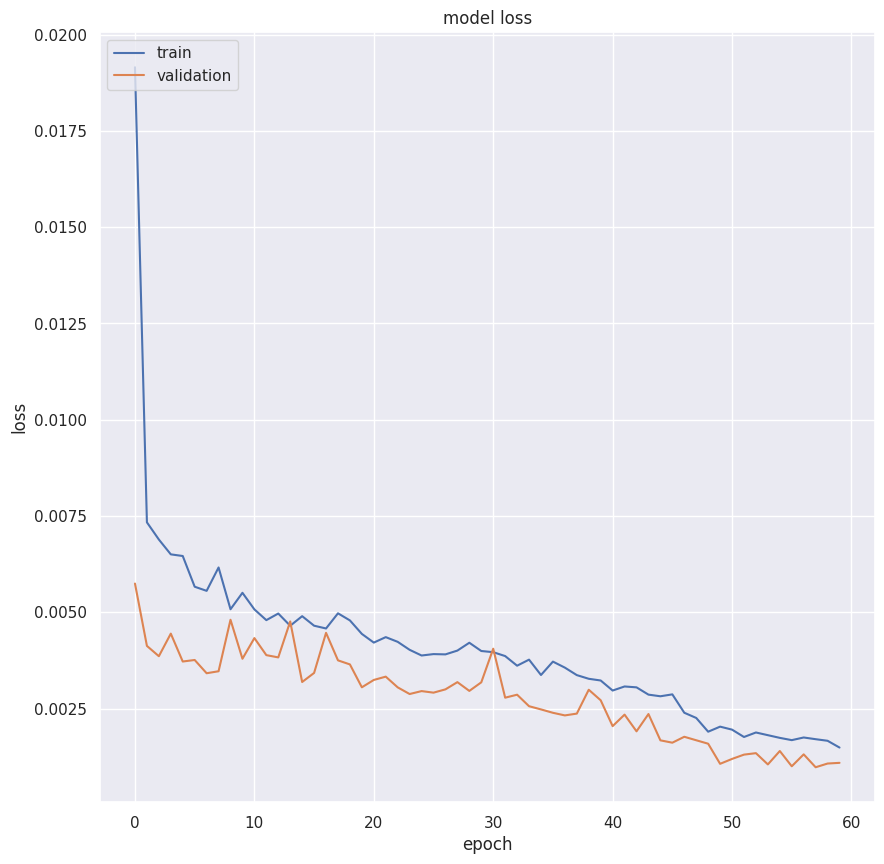

In [22]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


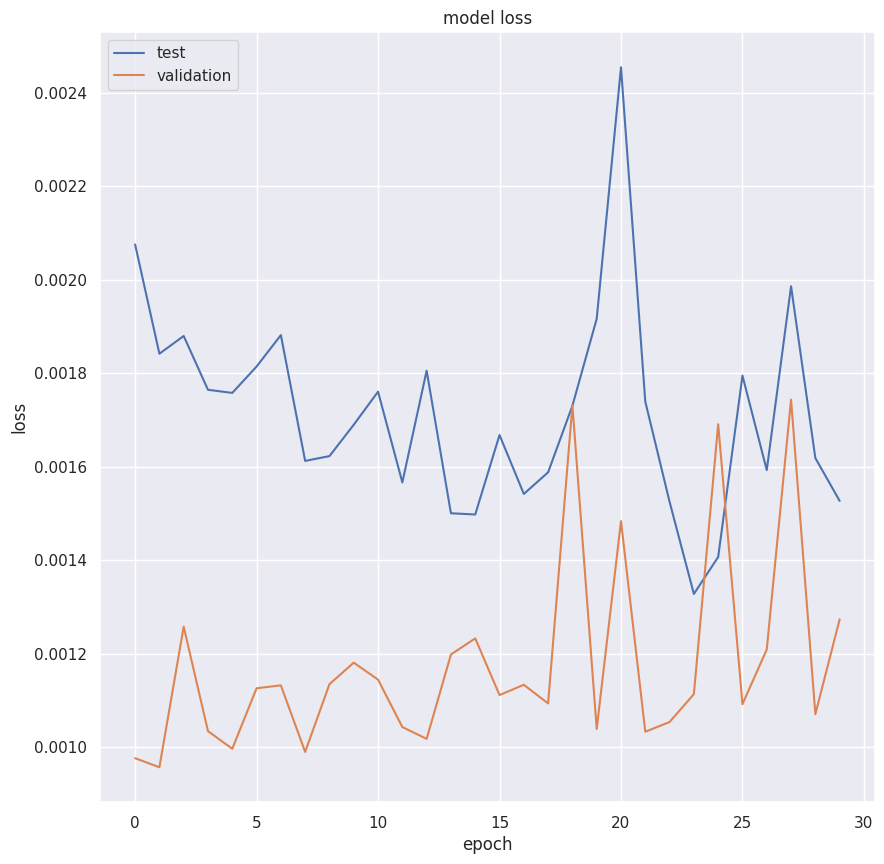

In [23]:
plt.figure(figsize=(10,10))
plt.plot(history2.history['loss']) # tb
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'validation'], loc='upper left')
plt.show()

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)

8/8 [==============================] - 1s 74ms/step


In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

# Transformasi kembali hasil prediksi ke dalam skala aslinya
#train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
#test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
#val_predict = scaler.inverse_transform(val_predict.reshape(-1, 1))


#**Prediction**

In [26]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)
#train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

41/41 [==============================] - 3s 76ms/step


In [27]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)
#val_predict = scaler.inverse_transform(val_predict.reshape(-1, 1))

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

8/8 [==============================] - 1s 106ms/step


In [28]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)
#test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()


11/11 [==============================] - 1s 104ms/step


In [29]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)

(1303, 1)
(338, 1)
(249, 1)
[9003.458]
(1303, 1)


In [30]:
import numpy as np
import matplotlib.pyplot as plt

ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[890:, :] = actual.reshape(-1, 1)  # Mengubah bentuk array actual agar sesuai dengan dimensi

TrainPredictionsPlot = np.empty_like(y)
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[890:, :] = train_predictions.reshape(-1, 1)  # Mengubah bentuk array train_predictions agar sesuai dengan dimensi

In [31]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()


8/8 [==============================] - 1s 74ms/step


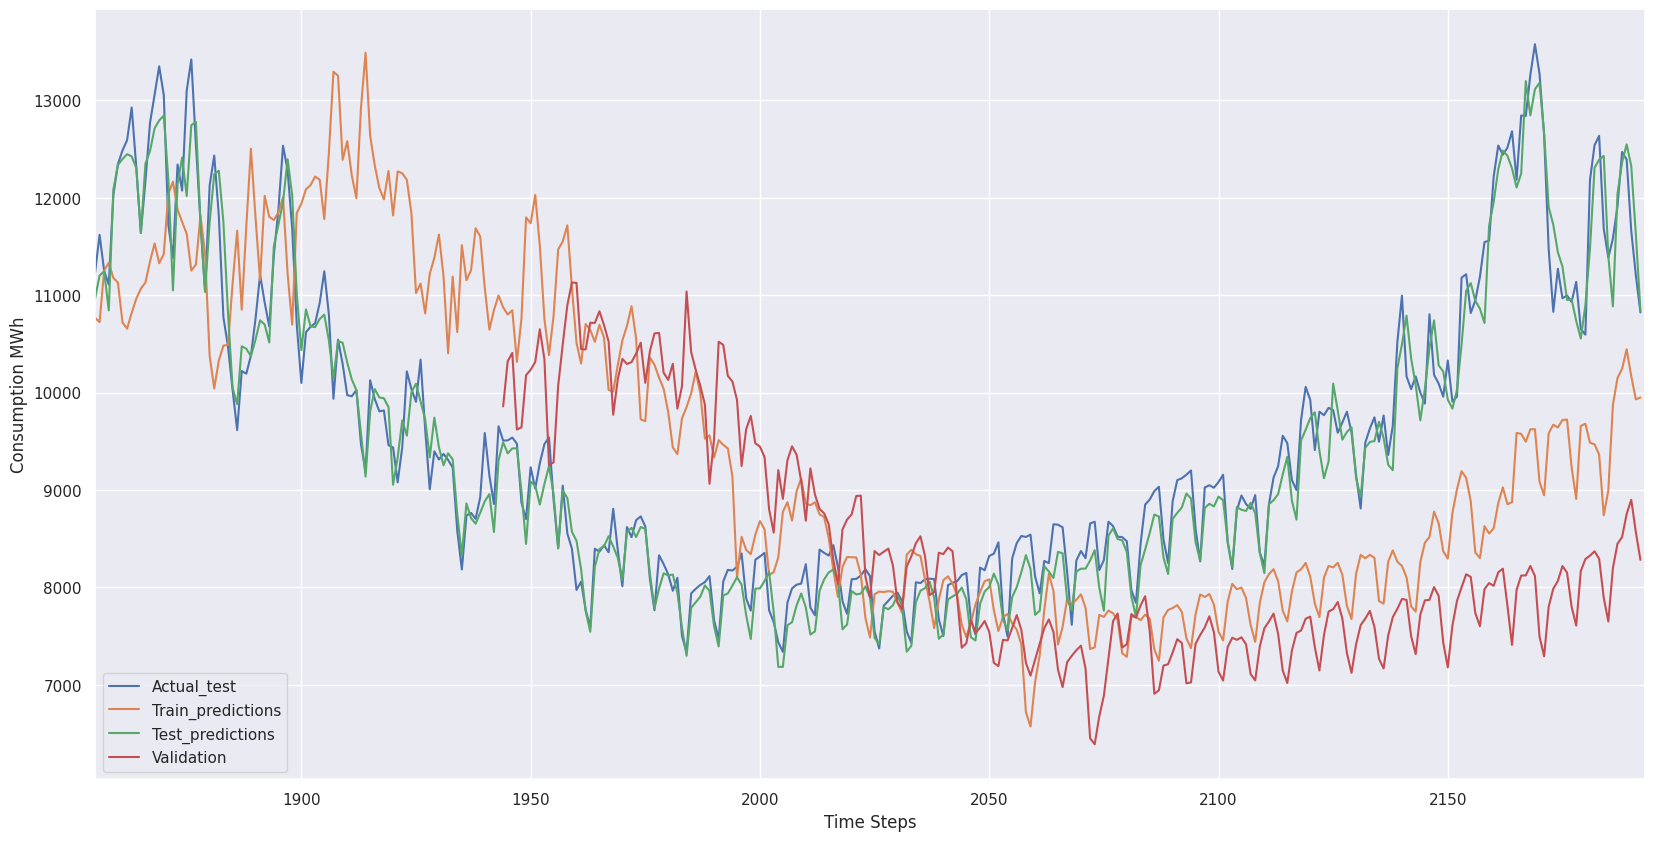

In [32]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1855:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Train Consumption
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[890:, :] = train_predictions.tolist()
plt.plot(trainPredictPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1855:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1944:, :] = val_predictions.reshape(-1, 1)  # Mengubah bentuk array actual agar sesuai dengan dimensi
plt.plot(ValPredictionsPlot)

plt.legend(['Actual_test', 'Train_predictions', 'Test_predictions','Validation'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

# Set x-axis limit
plt.xlim(1855, len(y))

plt.show()


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Menghitung MSE
mse_train = mean_squared_error(actual, train_predictions)
mse_test = mean_squared_error(actual_test, test_predictions)
mse_val = mean_squared_error(actual_val, val_predictions)

# Menghitung MAE
mae_train = mean_absolute_error(actual, train_predictions)
mae_test = mean_absolute_error(actual_test, test_predictions)
mae_val = mean_absolute_error(actual_val, val_predictions)

print("Mean Squared Error (MSE) - Train: ", mse_train)
print("Mean Squared Error (MSE) - Test: ", mse_test)
print("Mean Squared Error (MSE) - Validation: ", mse_val)

print("Mean Absolute Error (MAE) - Train: ", mae_train)
print("Mean Absolute Error (MAE) - Test: ", mae_test)
print("Mean Absolute Error (MAE) - Validation: ", mae_val)


Mean Squared Error (MSE) - Train:  92006.75777652964
Mean Squared Error (MSE) - Test:  80094.54820919664
Mean Squared Error (MSE) - Validation:  82900.26284666966
Mean Absolute Error (MAE) - Train:  237.1617848806873
Mean Absolute Error (MAE) - Test:  220.50385135447485
Mean Absolute Error (MAE) - Validation:  225.82129014245385


In [34]:
from sklearn.metrics import classification_report

# Mengonversi nilai prediksi menjadi biner berdasarkan threshold (misalnya 0.5)
threshold = 0.5
binary_pred_train = (train_predictions >= threshold).astype(int)
binary_actual_train = (y_train >= threshold).astype(int)

# Mencetak classification report untuk data pelatihan
print("Classification Report for Training Data:")
print(classification_report(binary_actual_train, binary_pred_train,zero_division=0))

# Lakukan hal yang sama untuk data validasi
binary_pred_val = (val_predictions >= threshold).astype(int)
binary_actual_val = (yval >= threshold).astype(int)

print("Classification Report for Validation Data:")
print(classification_report(binary_actual_val, binary_pred_val,zero_division=0))

# Dan untuk data uji
binary_pred_test = (test_predictions >= threshold).astype(int)
binary_actual_test = (ytest >= threshold).astype(int)

print("Classification Report for Test Data:")
print(classification_report(binary_actual_test, binary_pred_test,zero_division=0))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       894
           1       0.31      1.00      0.48       409

    accuracy                           0.31      1303
   macro avg       0.16      0.50      0.24      1303
weighted avg       0.10      0.31      0.15      1303

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       217
           1       0.13      1.00      0.23        32

    accuracy                           0.13       249
   macro avg       0.06      0.50      0.11       249
weighted avg       0.02      0.13      0.03       249

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       242
           1       0.28      1.00      0.44        96

    accuracy                           0.28       338
   macr